In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # added this import to check file is present in a directory or not

In [2]:
# get quality data
df = pd.read_csv('product_quality_log.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head()

,machine_id,product_id,quality
0,Printer F0815,P3.2.500,OK
1,Printer F0815,P3.2.501,OK
2,Printer F0815,P3.2.502,OK
3,Printer F0815,P3.2.503,OK
4,Printer F0815,P3.2.504,OK


In [3]:
# get timestamp data
df_timestamp = pd.read_csv('production_log.csv')
df_timestamp = df_timestamp.drop(df_timestamp.columns[[0]], axis=1)
df_timestamp.head()

,timestamp,product_id
0,2021-05-17_08-12-48,P3.2.500
1,2021-05-17_08-12-51,P3.2.501
2,2021-05-17_08-12-54,P3.2.502
3,2021-05-17_08-12-57,P3.2.503
4,2021-05-17_08-13-00,P3.2.504


In [4]:
df_merge = pd.merge(df,df_timestamp, on="product_id")

In [5]:
df_merge.head()

,machine_id,product_id,quality,timestamp
0,Printer F0815,P3.2.500,OK,2021-05-17_08-12-48
1,Printer F0815,P3.2.501,OK,2021-05-17_08-12-51
2,Printer F0815,P3.2.502,OK,2021-05-17_08-12-54
3,Printer F0815,P3.2.503,OK,2021-05-17_08-12-57
4,Printer F0815,P3.2.504,OK,2021-05-17_08-13-00


In [6]:
print("Quality Data - Number of rows : ", df.shape[0])
print("Timestamp data - Number of rows : ", df_timestamp.shape[0])
print("Merged Data - Number of rows : ", df_merge.shape[0])

Quality Data - Number of rows :  1656
Timestamp data - Number of rows :  1656
Merged Data - Number of rows :  1656


In [7]:
# Check missing values
df_merge.isnull().sum()
# no missing values

machine_id    0
product_id    0
quality       0
timestamp     0
dtype: int64

In [8]:
#### Check all files exist or not , and append that detail in the data frame
# initialize file_present column
df_merge["file_present"] = 1 # 1 indicates file is present

## Logic to check if all files are present or not
for index, row in df_merge.iterrows():
    #print(row['timestamp'])
    if os.path.isfile("vibrationdata/" + row['timestamp']) is False:
        df_merge.at[index, 'file_present'] = 0

print("Count of rows for which vibration data does not exist : ", len(df_merge[df_merge["file_present"] == 0].index))
## Since there is no missing vibration data file. Thus, not making any changes in dataframe.

df_merge

Count of rows for which vibration data does not exist :  0


,machine_id,product_id,quality,timestamp,file_present
0,Printer F0815,P3.2.500,OK,2021-05-17_08-12-48,1
1,Printer F0815,P3.2.501,OK,2021-05-17_08-12-51,1
2,Printer F0815,P3.2.502,OK,2021-05-17_08-12-54,1
3,Printer F0815,P3.2.503,OK,2021-05-17_08-12-57,1
4,Printer F0815,P3.2.504,OK,2021-05-17_08-13-00,1
...,...,...,...,...,...
1651,Printer F0815,P3.2.2151,nOK,2021-05-17_09-35-21,1
1652,Printer F0815,P3.2.2152,nOK,2021-05-17_09-35-24,1
1653,Printer F0815,P3.2.2153,nOK,2021-05-17_09-35-27,1
1654,Printer F0815,P3.2.2154,nOK,2021-05-17_09-35-30,1


In [9]:
## Check all vibration data files contain 20480 points
# initialize file_content column
df_merge["file_content"] = 1 # 1 indicates file has appropriate content

## Logic to check if all files have required number of rows
for index, row in df_merge.iterrows():
    num_lines = sum(1 for line in open("vibrationdata/" + row['timestamp']))
    if num_lines != 20480:
        df_merge.set_value[index, 'file_content'] = 0
        print(row['timestamp'])
        
print("Count of rows for which vibration data is not correct : ", len(df_merge[df_merge["file_content"] == 0].index))
## Since there is no inconsistent vibration data. Thus, not making any changes in dataframe.

Count of rows for which vibration data is not correct :  0


In [10]:
#### Dropping the two new generated columns
df_merge = df_merge.drop(['file_present', 'file_content'], axis=1)
df_merge

,machine_id,product_id,quality,timestamp
0,Printer F0815,P3.2.500,OK,2021-05-17_08-12-48
1,Printer F0815,P3.2.501,OK,2021-05-17_08-12-51
2,Printer F0815,P3.2.502,OK,2021-05-17_08-12-54
3,Printer F0815,P3.2.503,OK,2021-05-17_08-12-57
4,Printer F0815,P3.2.504,OK,2021-05-17_08-13-00
...,...,...,...,...
1651,Printer F0815,P3.2.2151,nOK,2021-05-17_09-35-21
1652,Printer F0815,P3.2.2152,nOK,2021-05-17_09-35-24
1653,Printer F0815,P3.2.2153,nOK,2021-05-17_09-35-27
1654,Printer F0815,P3.2.2154,nOK,2021-05-17_09-35-30


In [11]:
#### Examine all the data and determine mean, standard deviation, maximum value, minimum value, sum

##Initialize the features for both the sensors
df_merge["sum_1"] = 0.0
df_merge["mean_1"] = 0.0
df_merge["mode_1"] = 0.0
df_merge["median_1"] = 0.0
df_merge["var_1"] = 0.0
df_merge["std_dev_1"] = 0.0
df_merge["max_1"] = 0.0
df_merge["min_1"] = 0.0

df_merge["sum_2"] = 0.0
df_merge["mean_2"] = 0.0
df_merge["mode_2"] = 0.0
df_merge["median_2"] = 0.0
df_merge["var_2"] = 0.0
df_merge["std_dev_2"] = 0.0
df_merge["max_2"] = 0.0
df_merge["min_2"] = 0.0


## Logic to iterate over all the data and get the features
for index, row in df_merge.iterrows():
    data1=pd.read_csv("vibrationdata/" + row['timestamp'], sep="\t", header=None, 
                 names=["Sensor1", "Sensor2"])
    #print("Mean: ", data1["Sensor1"].mean())
    #print("Mode: ", data1["Sensor1"].mode().values[0])
    #print("Median: ", data1["Sensor1"].median())
    #print("Minimum: ", data1["Sensor1"].min())
    #print("Maximum: ", data1["Sensor1"].max())
    #print("Std deviation: ", data1["Sensor1"].std())
    #print("Variance: ", data1["Sensor1"].var())
    #print("Sum: ", data1["Sensor1"].sum())
    
    df_merge.loc[index, 'sum_1'] = data1["Sensor1"].sum()
    df_merge.loc[index, 'mean_1'] = data1["Sensor1"].mean()
    df_merge.loc[index, 'mode_1'] = data1["Sensor1"].mode().values[0]
    df_merge.loc[index, 'median_1'] = data1["Sensor1"].median()
    df_merge.loc[index, 'var_1'] = data1["Sensor1"].var()
    df_merge.loc[index, 'std_dev_1'] = data1["Sensor1"].std()
    df_merge.loc[index, 'min_1'] = data1["Sensor1"].min()
    df_merge.loc[index, 'max_1'] = data1["Sensor1"].max()
    
    df_merge.loc[index, 'sum_2'] = data1["Sensor2"].sum()
    df_merge.loc[index, 'mean_2'] = data1["Sensor2"].mean()
    df_merge.loc[index, 'mode_2'] = data1["Sensor2"].mode().values[0]
    df_merge.loc[index, 'median_2'] = data1["Sensor2"].median()
    df_merge.loc[index, 'var_2'] = data1["Sensor2"].var()
    df_merge.loc[index, 'std_dev_2'] = data1["Sensor2"].std()
    df_merge.loc[index, 'min_2'] = data1["Sensor2"].min()
    df_merge.loc[index, 'max_2'] = data1["Sensor2"].max()
    


In [42]:
print(df_merge.groupby('quality').size())

quality
OK     1564
nOK      92
dtype: int64


In [13]:
array = df_merge.values
X = array[:,4:]
y = array[:,2]

In [14]:
X

array([[-2407.1839999999997, -0.11753828124999999, -0.078, ...,
        0.07949439800422953, 0.254, -0.488],
       [-2394.986, -0.11694267578124999, -0.156, ...,
        0.07961567394192653, 0.2289999999999999, -0.505],
       [-2405.3059999999996, -0.11744658203124998, -0.159, ...,
        0.08134910701516722, 0.276, -0.496],
       ...,
       [-2384.45, -0.11642822265625, -0.159, ..., 0.14249898666959668,
        0.496, -0.83],
       [-2422.871, -0.118304248046875, -0.078, ..., 0.1502421795895786,
        0.552, -0.7909999999999999],
       [-2420.938, -0.11820986328125001, -0.127, ...,
        0.14634587297874438, 0.488, -0.82]], dtype=object)

In [15]:
y

array(['OK', 'OK', 'OK', ..., 'nOK', 'nOK', 'nOK'], dtype=object)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [59]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [60]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.942607 (0.003566)
LDA: 0.962987 (0.009850)
KNN: 0.941097 (0.005554)
CART: 0.950871 (0.016057)
NB: 0.963739 (0.012095)
SVM: 0.942607 (0.003566)


In [61]:
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [62]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9728915662650602
[[315   1]
 [  8   8]]
              precision    recall  f1-score   support

          OK       0.98      1.00      0.99       316
         nOK       0.89      0.50      0.64        16

    accuracy                           0.97       332
   macro avg       0.93      0.75      0.81       332
weighted avg       0.97      0.97      0.97       332



In [102]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.50, random_state=1)

#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_under, y_under = undersample.fit_resample(X_train, Y_train)

In [103]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.961402 (0.016819)
LDA: 0.960197 (0.015231)
KNN: 0.962592 (0.013654)
CART: 0.954114 (0.011783)
NB: 0.960153 (0.017084)
SVM: 0.961402 (0.015933)


In [106]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [107]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.966183574879227
[[781   1]
 [ 27  19]]
              precision    recall  f1-score   support

          OK       0.97      1.00      0.98       782
         nOK       0.95      0.41      0.58        46

    accuracy                           0.97       828
   macro avg       0.96      0.71      0.78       828
weighted avg       0.97      0.97      0.96       828



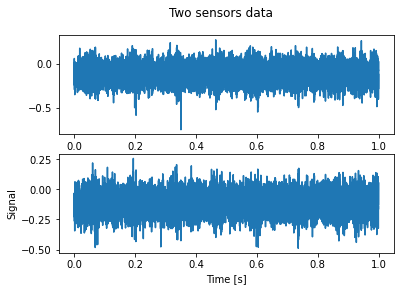

In [21]:
#### Not part of the solution ####
## Checking vibration data
sample_frequency = 20480 # Hz
signal_timewindow = 1 # seconds

# Generate Signal Data
t = np.linspace(0, signal_timewindow, round(signal_timewindow*sample_frequency))

data1=pd.read_csv("vibrationdata/2021-05-17_08-12-48", sep="	", header=None, 
                 names=["Sensor1", "Sensor2"])

fig, axs = plt.subplots(2)
fig.suptitle('Two sensors data')

plt.ylabel("Signal")
plt.xlabel("Time [s]")
#plt.plot(t, data1["sum"].tail(2000))
axs[0].plot(t, data1["Sensor1"])
axs[1].plot(t, data1["Sensor2"])
plt.show()